In [1]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import utils
from analysis import ModelAnalysis
from sklearn.metrics import (d2_absolute_error_score, max_error,
                             mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error,
                             r2_score)
from sklearn.ensemble import RandomForestRegressor
import numpy as np
np.random.seed(42)


In [2]:
# define models

models = {}
models['forest_default'] = RandomForestRegressor(random_state=42)
for ne in [20, 30, 70]:
    for md in [18, 20]:
        for mss in [2, 3, 4]:
            models[f'forest_ne_{ne}_md_{md}_ms_{mss}'] = RandomForestRegressor(
                random_state=42,
                n_estimators=ne,
                max_depth=md,
                min_samples_split=mss
            )

# best
# best_tree = DecisionTreeRegressor(
#     random_state=42,
#     max_depth=18,
#     min_samples_leaf=4
# )
# ma = ModelAnalysis(models={
#     'tree_default': tree_default,
#     'tree_default_ms_4': tree_default_ms_4,
#     # 'tree_md_14': tree_md_14,
#     # 'tree_md_16': tree_md_16,
#     # 'tree_md_18': tree_md_18,
#     # 'tree_md_18_ms_4': tree_md_18_ms_4,
#     # 'tree_md_20': tree_md_20,
#     # 'tree_md_22': tree_md_22,
# })
best_model = {
    'default_forest': RandomForestRegressor(random_state=42),
    'forest_ne_30_md_18_ms_2': RandomForestRegressor(
        random_state=42,
        n_estimators=30,
        max_depth=18,
        min_samples_split=2
    )
}
ma = ModelAnalysis(models=best_model)


In [3]:
ma.train(track_emissions=True)
_ = ma.predict(split='train')
_ = ma.predict(split='val')
_ = ma.predict(split='test')

Fitting default_forest
Fitting forest_ne_30_md_18_ms_2


/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:117: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:121: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(pred_df[[k for k in self.models.keys() if k != 'Y']],
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:117: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:121: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(pred_df[[k for k in self.models.keys() if k != 'Y']],


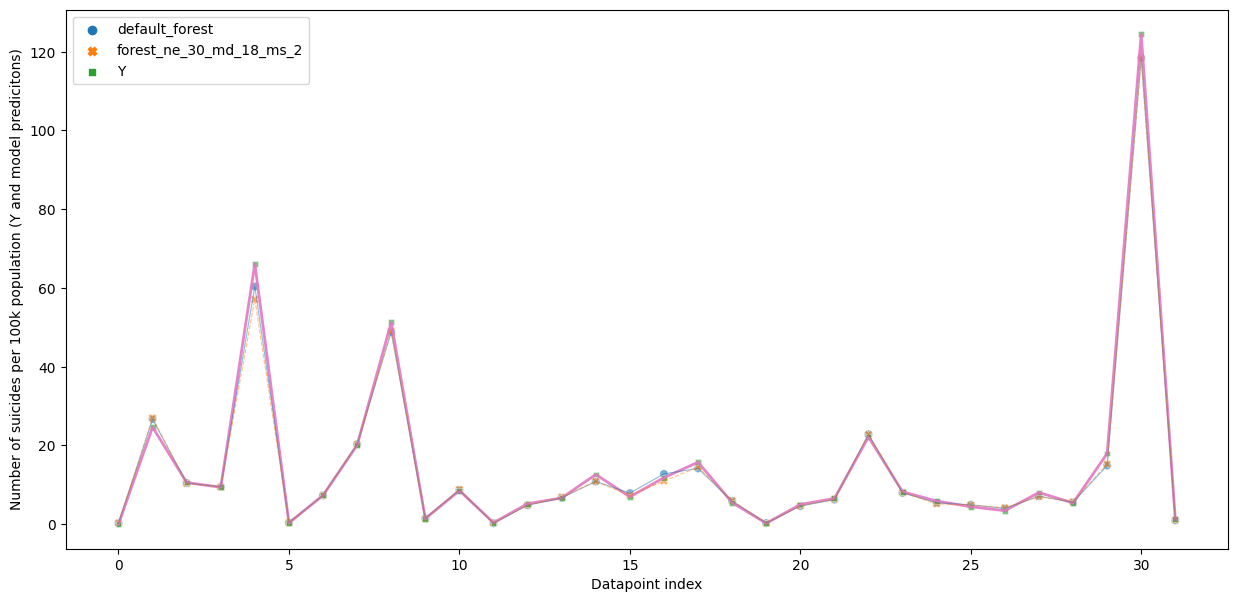

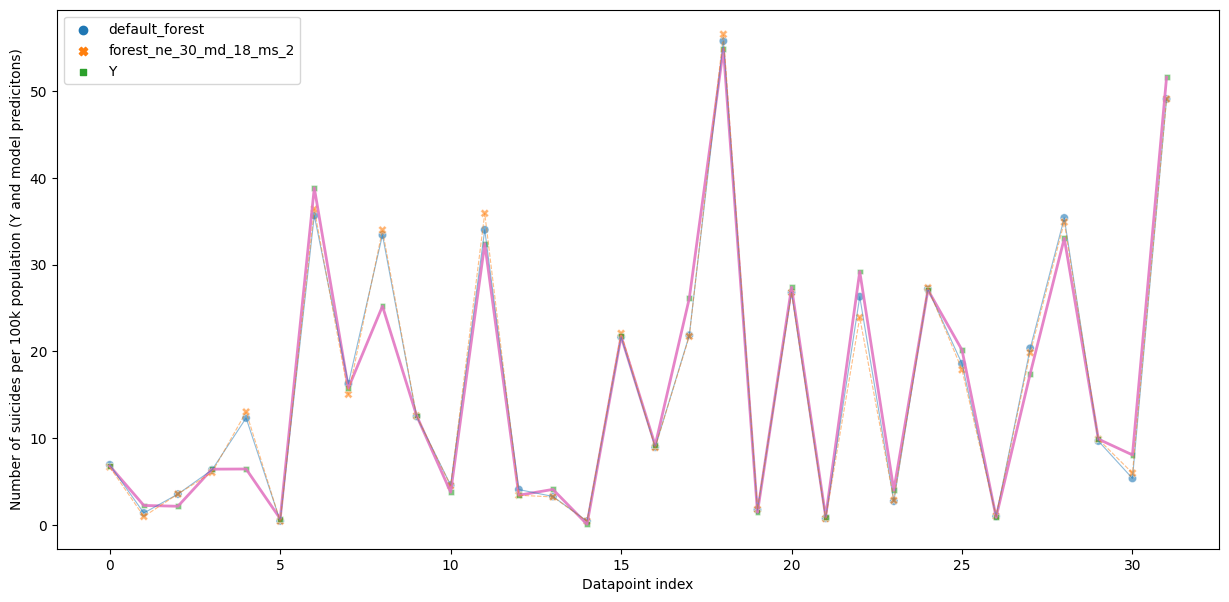

In [4]:
ma.visualize_predictions(split='train')
ma.visualize_predictions(split='val')

mean_squared_error
min: default_forest
                     model     score
0           default_forest  2.779186
1  forest_ne_30_md_18_ms_2  3.055118
r2_score
min: default_forest
                     model     score
0           default_forest  0.990919
1  forest_ne_30_md_18_ms_2  0.990017
max_error
min: default_forest
                     model      score
0           default_forest  27.435600
1  forest_ne_30_md_18_ms_2  29.500667
root_mean_squared_error
min: default_forest
                     model     score
0           default_forest  1.667089
1  forest_ne_30_md_18_ms_2  1.747889
mean_absolute_error
min: default_forest
                     model     score
0           default_forest  0.808264
1  forest_ne_30_md_18_ms_2  0.840754
VAL
mean_squared_error
min: forest_ne_30_md_18_ms_2
                     model     score
0           default_forest  9.519218
1  forest_ne_30_md_18_ms_2  8.155807
r2_score
min: forest_ne_30_md_18_ms_2
                     model     score
0           default_fo

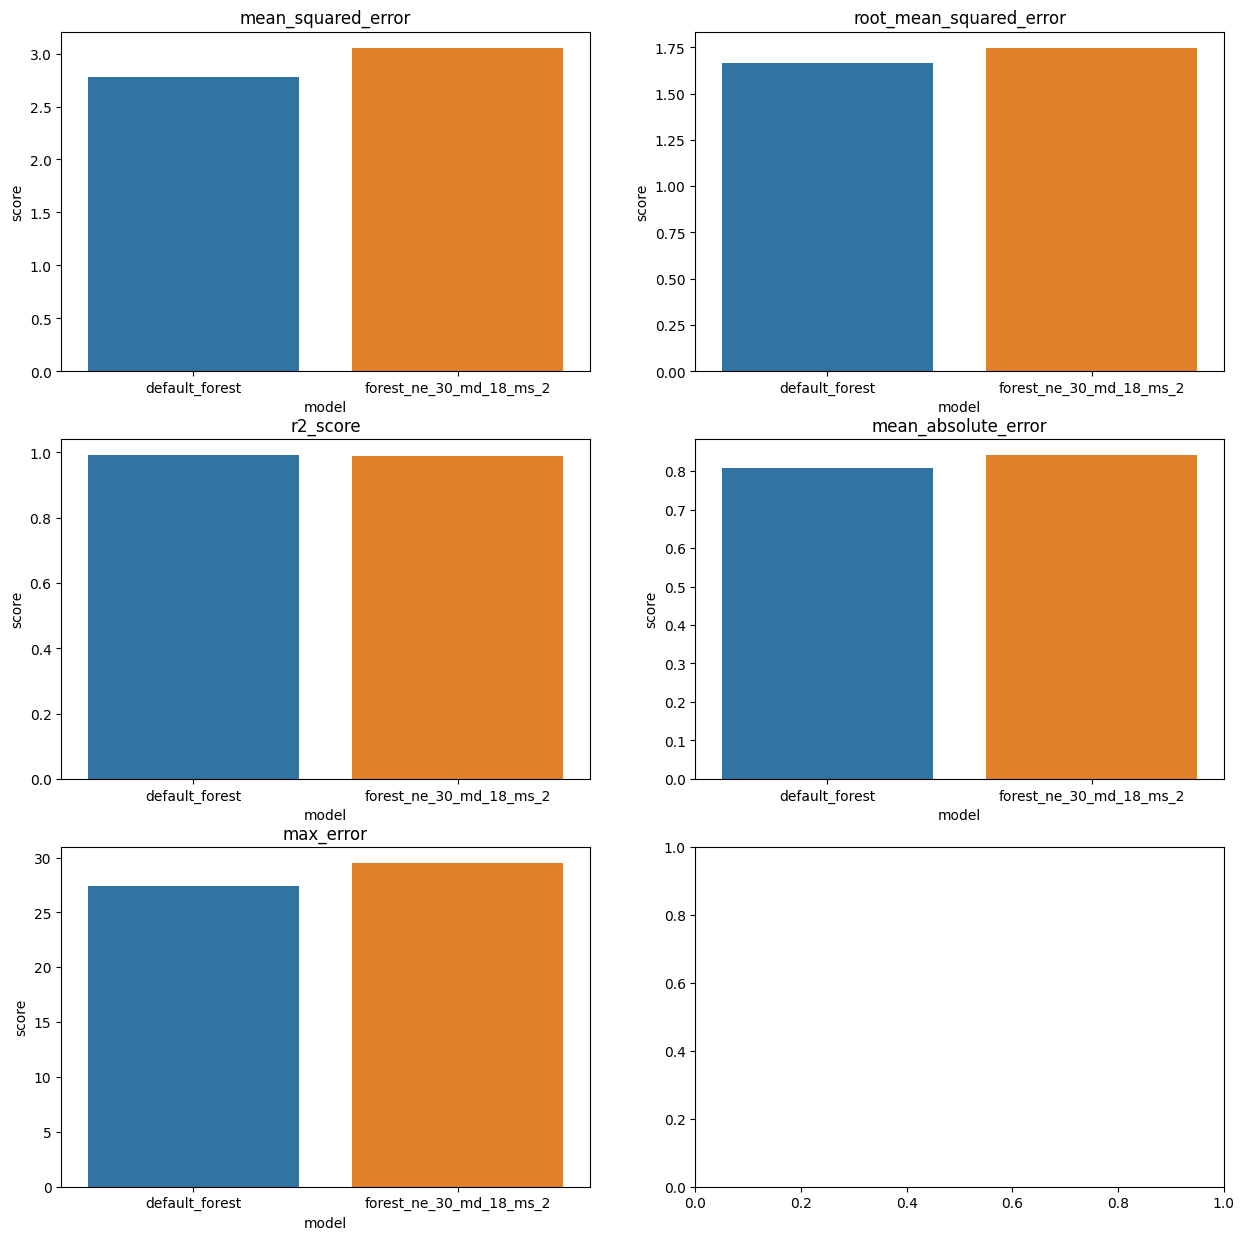

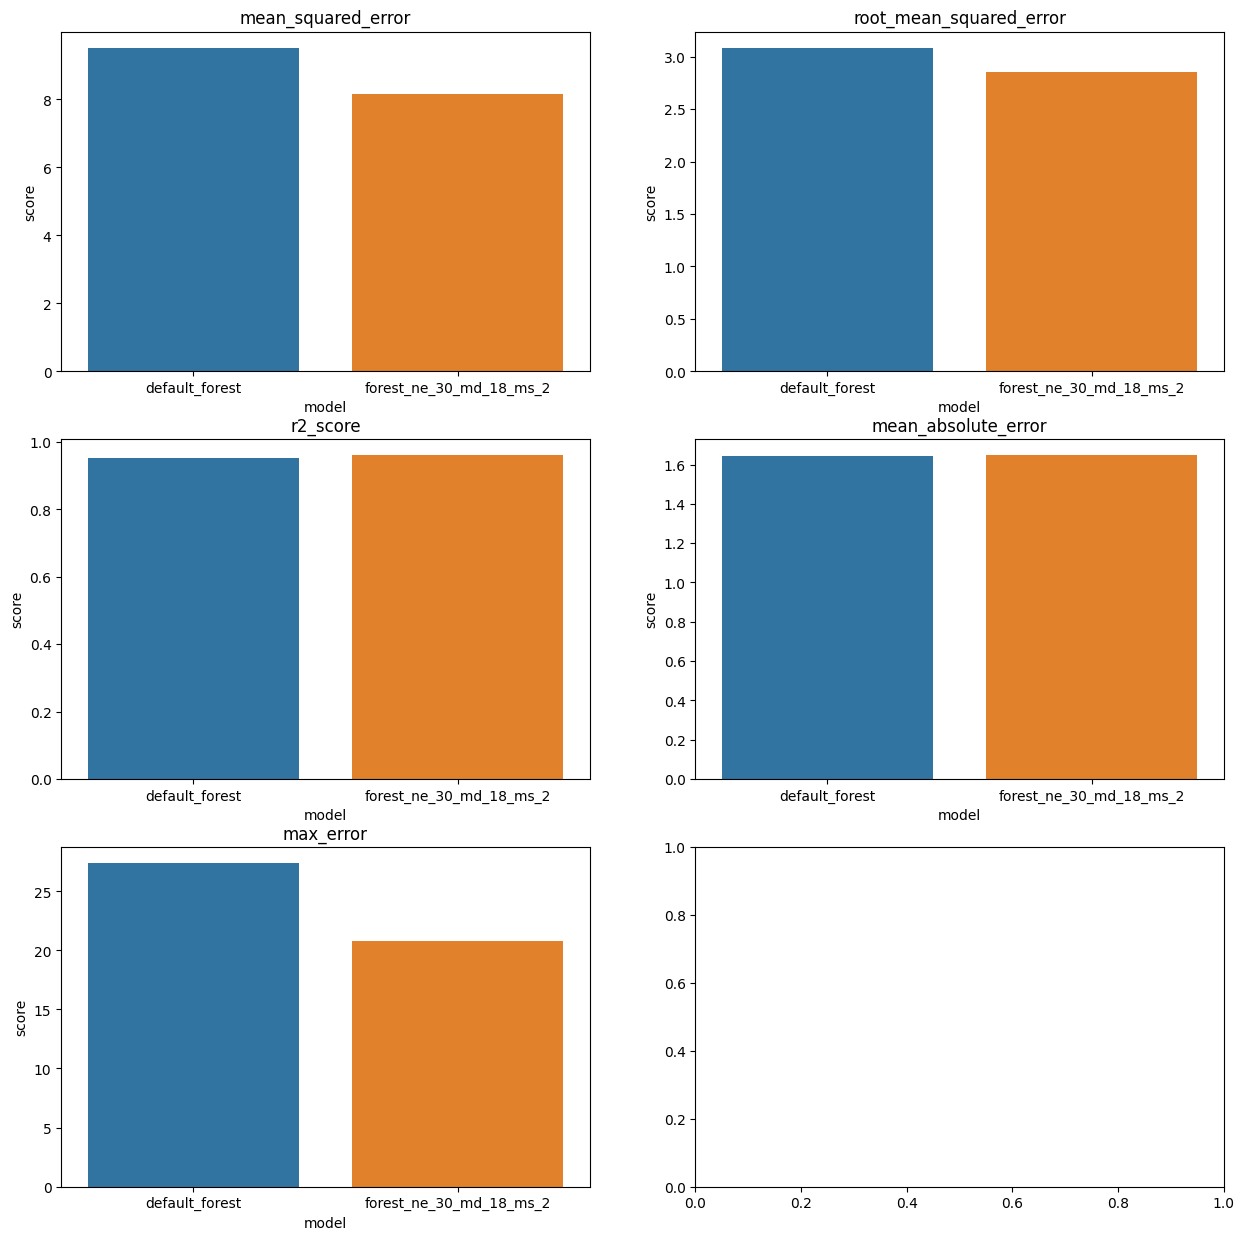

In [5]:
df = ma.visualize_metrics(split='train', verbose=True)

print(f"VAL")
df = ma.visualize_metrics(split='val', verbose=True)
# df = ma.visualize_metrics(split='train')

In [6]:
# save models
ma.save_models(base_path="models/forest")